In [1]:
import yaml
from google.cloud import bigquery


In [2]:
config = yaml.load(open("credentials.yml"), yaml.Loader)
client = bigquery.Client.from_service_account_json(config["credentials_path"])


In [3]:
dataset_ref = bigquery.DatasetReference("bigquery-public-data", "crypto_bitcoin")
table_ref = bigquery.TableReference(dataset_ref, "transactions")

table = client.get_table(table_ref)
client.list_rows(table, max_results=5).to_dataframe()


,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,275,275,1,0,00000000dc55860c8a29c58d45209318fa9e9dc2c1833a...,181,2009-01-12 06:02:13+00:00,2009-01-01,1,2,4000000000.000000000,4000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'f4184...","[{'index': 0, 'script_asm': '04b5abd412d4341b4..."
1,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,275,275,1,0,0000000054487811fc4ff7a95be738aa5ad9320c394c48...,182,2009-01-12 06:12:16+00:00,2009-01-01,1,2,3000000000.000000000,3000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'a16f3...","[{'index': 0, 'script_asm': '0401518fa1d1e1e3e..."
2,12b5633bad1f9c167d523ad1aa1947b2732a865bf5414e...,276,276,1,0,00000000f46e513f038baf6f2d9a95b2a28d8a6c985bcf...,183,2009-01-12 06:34:22+00:00,2009-01-01,1,2,2900000000.000000000,2900000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '591e9...","[{'index': 0, 'script_asm': '04baa9d3665315562..."
3,828ef3b079f9c23829c56fe86e85b4a69d9e06e5b54ea5...,276,276,1,0,00000000fb5b44edc7a1aa105075564a179d65506e2bd2...,248,2009-01-12 20:04:20+00:00,2009-01-01,1,2,2800000000.000000000,2800000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '12b56...","[{'index': 0, 'script_asm': '04bed827d37474bef..."
4,35288d269cee1941eaebb2ea85e32b42cdb2b04284a56d...,277,277,1,0,00000000689051c09ff2cd091cc4c22c10b965eb8db3ad...,545,2009-01-15 05:48:32+00:00,2009-01-01,1,2,2500000000.000000000,2500000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'd71fd...","[{'index': 0, 'script_asm': '044a656f065871a35..."


In [4]:
# Query to select the number of transactions per date, sorted by date
query = """
    WITH time AS
    (
        SELECT DATE(block_timestamp) as trans_date
        FROM `bigquery-public-data.crypto_bitcoin.transactions`
    )
    SELECT COUNT(1) AS transactions, trans_date
    FROM time
    GROUP BY trans_date
    ORDER BY trans_date
"""

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)  # 10 GB
query_job = client.query(query, job_config=safe_config)
query_results = query_job.to_dataframe()
query_results

,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12
...,...,...
5370,441679,2023-09-22
5371,629617,2023-09-23
5372,441181,2023-09-24
5373,285750,2023-09-25


<Axes: xlabel='trans_date'>

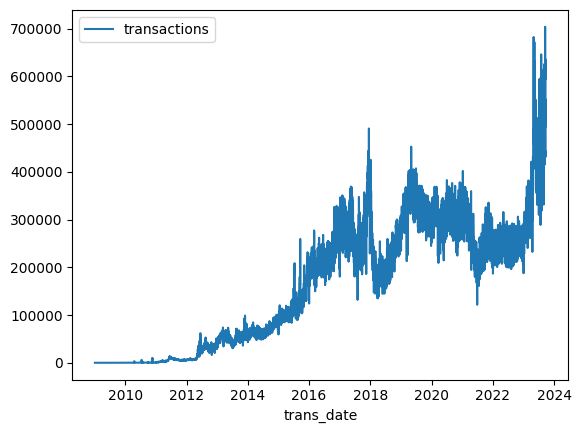

In [4]:
query_results.set_index("trans_date").plot()


In [5]:
dataset_ref = bigquery.DatasetReference("bigquery-public-data", "chicago_taxi_trips")

# for table in client.list_tables(dataset_ref):
#     print(table.table_id)

table_ref = bigquery.TableReference(dataset_ref, "taxi_trips")
table = client.get_table(table_ref)
client.list_rows(table, max_results=5).to_dataframe()


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,9733c33acb25f045d791e0866c0479226d06c86c,b103a8eb64ada2139668ccbde9c39af73dcf878f25f561...,2014-09-19 12:30:00+00:00,2014-09-19 12:45:00+00:00,300,1.0,<NA>,<NA>,<NA>,<NA>,...,1.0,6.65,Cash,None,NaN,NaN,None,NaN,NaN,None
1,e162197956293c65b5604ca6b1da14cefeb7d6e7,16a529a73f019759aa8f1b563ab8511b26a91d65659188...,2013-02-28 19:45:00+00:00,2013-02-28 19:45:00+00:00,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,...,0.0,15.28,Credit Card,Chicago Elite Cab Corp.,NaN,NaN,None,NaN,NaN,None
2,a1664750fa457782945669fe7707a17aa5914a49,fe659851fec6b2684321a52e42b1a316dd6657ba108f61...,2013-02-28 19:15:00+00:00,2013-02-28 19:30:00+00:00,1080,0.0,<NA>,<NA>,<NA>,<NA>,...,0.0,8.45,Cash,Chicago Elite Cab Corp.,NaN,NaN,None,NaN,NaN,None
3,afbb5ccfb01396b971610914538f264d6941c0ad,259ec57ee4a3f4361280f1b1ad63487de078fefba3967b...,2013-03-03 11:15:00+00:00,2013-03-03 11:15:00+00:00,0,0.0,<NA>,<NA>,<NA>,<NA>,...,0.0,13.45,Credit Card,Taxi Affiliation Services,NaN,NaN,None,NaN,NaN,None
4,cf8ea5e9410bb64a45a1ca25618c4d67a91fb239,cd75f70d5f3c873de240d29a244e101e2808b0a4dd2b42...,2013-02-23 11:30:00+00:00,2013-02-23 11:30:00+00:00,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,...,0.0,6.05,Credit Card,Taxi Affiliation Services,NaN,NaN,None,NaN,NaN,None


In [6]:
table.schema

[SchemaField('unique_key', 'STRING', 'REQUIRED', None, 'Unique identifier for the trip.', (), None),
 SchemaField('taxi_id', 'STRING', 'REQUIRED', None, 'A unique identifier for the taxi.', (), None),
 SchemaField('trip_start_timestamp', 'TIMESTAMP', 'NULLABLE', None, 'When the trip started, rounded to the nearest 15 minutes.', (), None),
 SchemaField('trip_end_timestamp', 'TIMESTAMP', 'NULLABLE', None, 'When the trip ended, rounded to the nearest 15 minutes.', (), None),
 SchemaField('trip_seconds', 'INTEGER', 'NULLABLE', None, 'Time of the trip in seconds.', (), None),
 SchemaField('trip_miles', 'FLOAT', 'NULLABLE', None, 'Distance of the trip in miles.', (), None),
 SchemaField('pickup_census_tract', 'INTEGER', 'NULLABLE', None, 'The Census Tract where the trip began. For privacy, this Census Tract is not shown for some trips.', (), None),
 SchemaField('dropoff_census_tract', 'INTEGER', 'NULLABLE', None, 'The Census Tract where the trip ended. For privacy, this Census Tract is not s

In [7]:
# Write a query that counts the number of trips in each year.

query = """
    WITH trips AS
    (
        SELECT unique_key AS trip_id, EXTRACT(YEAR FROM trip_start_timestamp) AS year
        FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
    )
    SELECT COUNT(trip_id) AS num_trips, year
    FROM trips
    GROUP BY year
    ORDER BY num_trips DESC
"""

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)  # 10 GB
query_job = client.query(query, job_config=safe_config)
query_results = query_job.to_dataframe()
query_results


,num_trips,year
0,8789429,2013
1,7213186,2016
2,126404,2017
3,57718,2018
4,19728,2014
5,1848,2015
6,540,2022


In [8]:
# You'd like to take a closer look at rides from 2016. Copy the query you used above.
# Then modify it in two ways:
# 1. Use a **WHERE** clause to limit the query to data from 2016.
# 2. Modify the query to extract the month rather than the year.

query = """
    WITH trips_2016 AS
    (
        SELECT unique_key AS trip_id, EXTRACT(MONTH FROM trip_start_timestamp) AS month
        FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
        WHERE EXTRACT(YEAR FROM trip_start_timestamp) = 2016
    )
    SELECT month, COUNT(trip_id) as num_trips
    FROM trips_2016
    GROUP BY month
    ORDER BY month ASC
"""

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)  # 10 GB
query_job = client.query(query, job_config=safe_config)
query_results = query_job.to_dataframe()
query_results

,month,num_trips
0,1,110203
1,2,240221
2,3,574801
3,4,1048524
4,5,1053719
5,6,1058910
6,7,961437
7,8,869111
8,9,812615
9,10,477507


In [9]:
# Write a query that shows, for each hour of the day in the dataset, the corresponding number of trips and average speed.
# Restrict your query to data meeting the following criteria:
# - a `trip_start_timestamp` > **2016-01-01** and < **2016-04-01**
# - `trip_seconds` > 0 and `trip_miles` > 0

query = """
    WITH RelevantRides AS
    (
       SELECT trip_seconds,
              trip_miles,
              EXTRACT(HOUR FROM trip_start_timestamp) as hour_of_day
       FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
       WHERE trip_start_timestamp > '2016-01-01' AND
             trip_start_timestamp < '2016-04-01' AND
             trip_seconds > 0 AND
             trip_miles > 0
    )
    SELECT hour_of_day, 
           COUNT(1) as num_trips, 
           3600 * SUM(trip_miles) / SUM(trip_seconds) AS avg_mph
    FROM RelevantRides
    GROUP BY hour_of_day
    ORDER BY hour_of_day
"""

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)  # 10 GB
query_job = client.query(query, job_config=safe_config)
query_results = query_job.to_dataframe()
query_results


,hour_of_day,num_trips,avg_mph
0,0,24462,16.452562
1,1,19606,17.206288
2,2,14999,15.286068
3,3,10776,15.419919
4,4,7824,17.328948
5,5,5667,25.488304
6,6,6505,26.447964
7,7,11763,19.472619
8,8,25023,14.148491
9,9,35267,12.620371
